<a href="https://colab.research.google.com/github/erickxllx/Mid-Term-due-in-stages/blob/main/Editedcodeformidterm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00
>> Please upload your CSV file (e.g., student_info.csv)


Saving student_info.csv to student_info.csv
CSV received: student_info.csv
Shape: (1000, 15)
Columns: ['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'parent_education', 'study_hours', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']

=== BEFORE: info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  10

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass



Numeric columns: ['age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']
Categorical columns: ['student_id', 'name', 'gender', 'parent_education', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']

=== EDA: Class Distribution ===


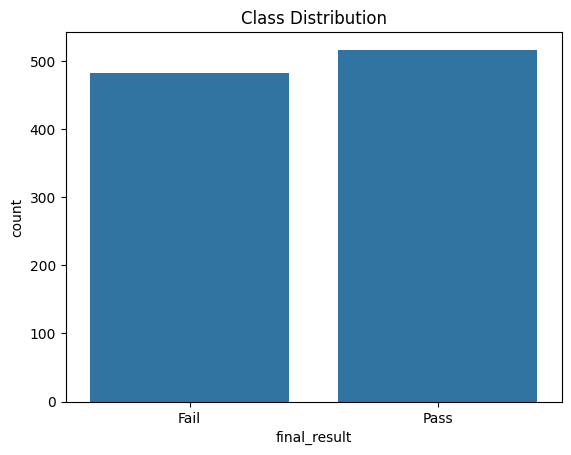

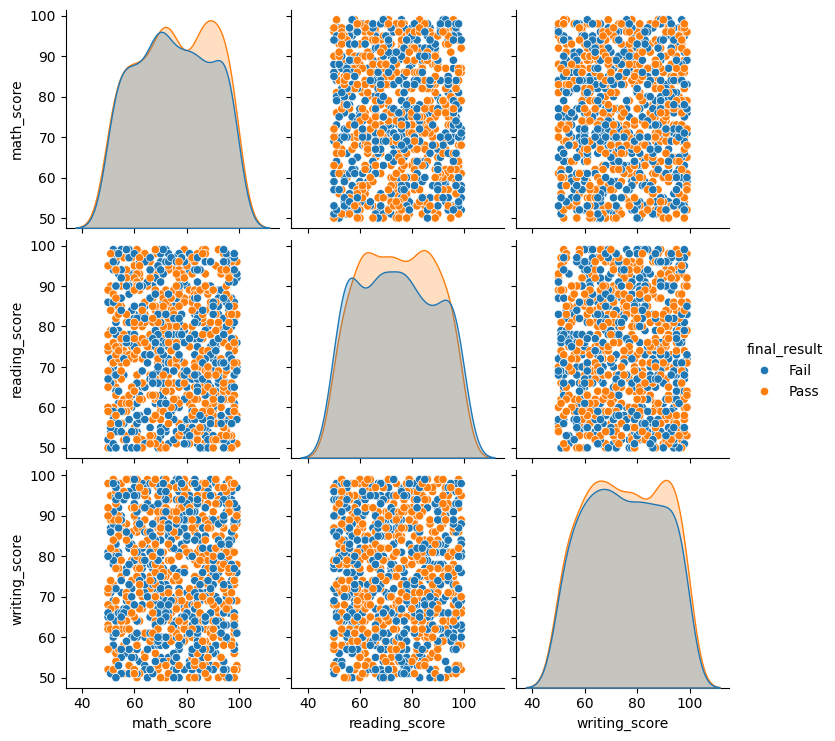

New features added: avg_score, study_efficiency

=== LogisticRegression ===
Accuracy: 0.495
Precision: 0.4952
Recall: 0.495
F1: 0.4951

Classification Report:
               precision    recall  f1-score   support

        Fail       0.48      0.48      0.48        97
        Pass       0.51      0.50      0.51       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.50       200



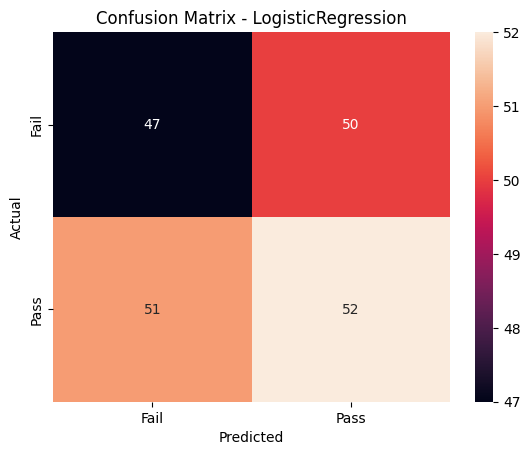


=== RandomForest ===
Accuracy: 0.55
Precision: 0.5519
Recall: 0.55
F1: 0.5495

Classification Report:
               precision    recall  f1-score   support

        Fail       0.53      0.59      0.56        97
        Pass       0.57      0.51      0.54       103

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



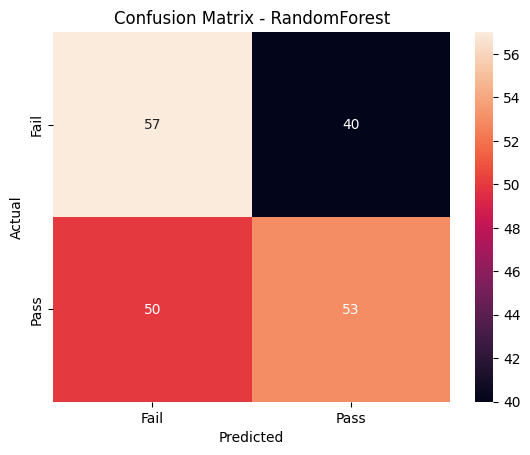

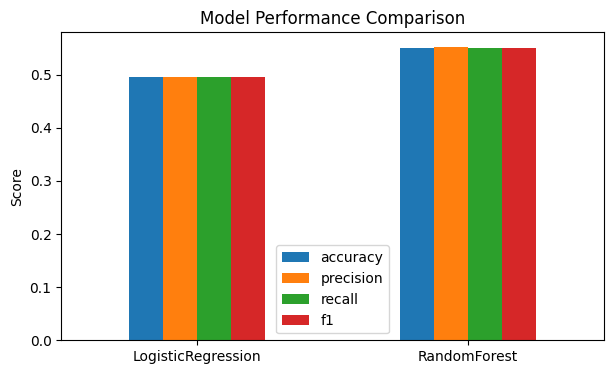

,accuracy,precision,recall,f1
LogisticRegression,0.495,0.495151,0.495,0.495063
RandomForest,0.550,0.551859,0.550,0.549550


Best RF parameters: {'clf__max_depth': None, 'clf__n_estimators': 500}


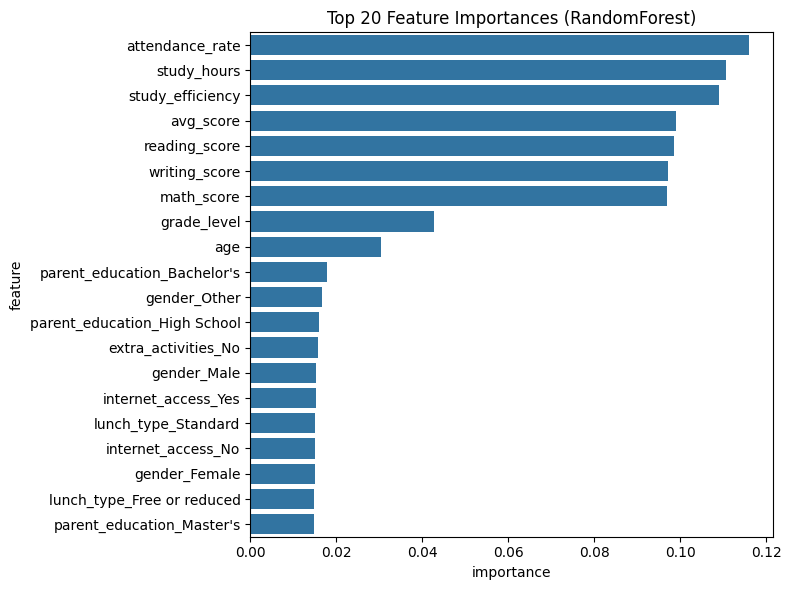

,feature,importance
5,attendance_rate,0.115933
6,study_hours,0.110719
8,study_efficiency,0.109145
7,avg_score,0.099164
3,reading_score,0.098627
4,writing_score,0.097226
2,math_score,0.097044
1,grade_level,0.042771
0,age,0.030442
12,parent_education_Bachelor's,0.017792


 99%|===================| 396/400 [01:06<00:00]       

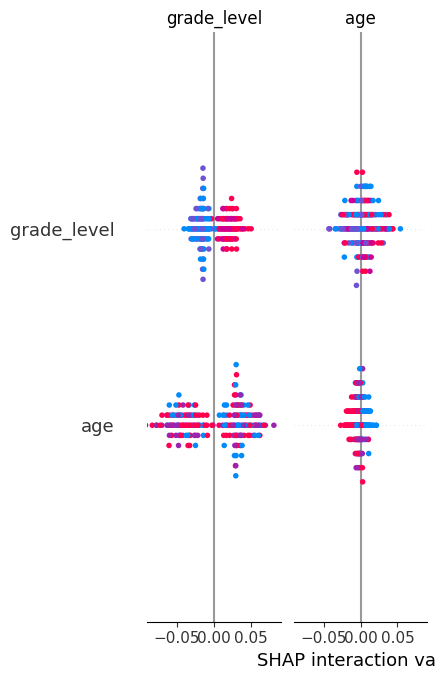


✅ Enhanced PDF generated: student_performance_report.pdf


In [1]:
# ============================================
# Student Academic Performance – Enhanced Version
# Authors: Peter Amoye/ Erick Banegas/Alhassane Samassekou
# Date: October 2025
# ============================================

!pip -q install reportlab scikit-learn pandas matplotlib seaborn shap

import io, datetime, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.utils.class_weight import compute_class_weight

from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch

# ------- Configuration -------
DATASET_URL = "https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset"
PDF_NAME = "student_performance_report.pdf"
PROJECT_TITLE = "Predicting Student Academic Performance"
AUTHOR = "Peter Amoye"
target_col = "final_result"
drop_cols = ["student_id", "name"]

# ------- 1) Upload CSV -------
print(">> Please upload your CSV file (e.g., student_info.csv)")
uploaded = files.upload()
csv_candidates = [k for k in uploaded.keys() if k.lower().endswith(".csv")]
assert csv_candidates, "No CSV file uploaded!"
csv_path = csv_candidates[0]
print("CSV received:", csv_path)

df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# ------- 2) BEFORE (raw dataset) -------
print("\n=== BEFORE: info() ===")
buf = io.StringIO(); df.info(buf=buf); print(buf.getvalue())
print("\n=== BEFORE: Missing values (count) ==="); print(df.isna().sum())
print("\n=== BEFORE: Head ==="); display(df.head())

num_cols_raw = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_raw = [c for c in df.columns if c not in num_cols_raw]
print("\nNumeric columns:", num_cols_raw)
print("Categorical columns:", cat_cols_raw)

# ------- 3) Quick EDA -------
print("\n=== EDA: Class Distribution ===")
sns.countplot(data=df, x=target_col)
plt.title("Class Distribution")
plt.show()

sns.pairplot(df, vars=['math_score','reading_score','writing_score'], hue=target_col)
plt.show()

# ------- 4) Feature Engineering -------
df["avg_score"] = df[["math_score","reading_score","writing_score"]].mean(axis=1)
df["study_efficiency"] = df["avg_score"] / (df["study_hours"] + 0.1)
print("New features added: avg_score, study_efficiency")

# ------- 5) Data Preparation -------
assert target_col in df.columns, f"Target column '{target_col}' not found!"
X = df.drop(columns=[target_col] + [c for c in drop_cols if c in df.columns], errors="ignore")
y = df[target_col].astype(str)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# ------- 6) Train/Test Split -------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(
    [("num", numeric_transformer, num_cols),
     ("cat", categorical_transformer, cat_cols)],
    remainder="drop"
)

# ------- 7) Models with Class Balancing -------
logreg = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"))
])

models = {"LogisticRegression": logreg, "RandomForest": rf}
results = {}

# ------- 8) Model Training -------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results[name] = {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1:", round(f1, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

# ------- 9) Model Comparison -------
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(7,4))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
display(results_df)

# ------- 10) Hyperparameter Tuning (Random Forest) -------
param_grid = {
    "clf__n_estimators": [100, 300, 500],
    "clf__max_depth": [None, 10, 20]
}
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
print("Best RF parameters:", grid.best_params_)
best_rf = grid.best_estimator_

# ------- 11) Feature Importance -------
best_rf.named_steps["clf"].fit(preprocess.transform(X_train), y_train)
ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
after_cols = num_cols + list(ohe.get_feature_names_out(cat_cols))
importances = best_rf.named_steps["clf"].feature_importances_
imp_df = pd.DataFrame({"feature": after_cols, "importance": importances}).sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x="importance", y="feature")
plt.title("Top 20 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()
display(imp_df)

# ------- 12) Explainability with SHAP -------
explainer = shap.Explainer(best_rf.named_steps["clf"], preprocess.transform(X_train))
shap_values = explainer(preprocess.transform(X_test))
shap.summary_plot(shap_values, preprocess.transform(X_test), feature_names=after_cols)

# ------- 13) Enhanced PDF Report -------
def split_text(text, max_chars=95):
    words, lines, cur = text.split(), [], []
    count = 0
    for w in words:
        extra = 1 if cur else 0
        if count + len(w) + extra <= max_chars:
            cur.append(w); count += len(w) + extra
        else:
            lines.append(" ".join(cur)); cur = [w]; count = len(w)
    if cur: lines.append(" ".join(cur))
    return lines

def generate_pdf(pdf_path, title, author, dataset_url, before_txt, after_txt, results_dict):
    c = canvas.Canvas(pdf_path, pagesize=LETTER)
    w, h = LETTER
    m = 0.8*inch
    y = h - m

    c.setFont("Helvetica-Bold", 16); c.drawString(m, y, title); y -= 20
    c.setFont("Helvetica", 10)
    c.drawString(m, y, f"Author: {author}"); y -= 14
    c.drawString(m, y, f"Date: {datetime.date.today().strftime('%B %d, %Y')}"); y -= 14
    c.drawString(m, y, f"Dataset URL: {dataset_url}"); y -= 18

    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Objective"); y -= 12
    for line in split_text("Predict student outcomes and identify major factors affecting academic performance using machine learning models.", 95):
        c.drawString(m, y, line); y -= 12

    y -= 6
    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Before → After Processing"); y -= 12
    c.setFont("Helvetica", 10); c.drawString(m, y, "Before:"); y -= 12
    for line in split_text(before_txt, 95):
        c.drawString(m+15, y, line); y -= 12
    c.drawString(m, y, "After:"); y -= 12
    for line in split_text(after_txt, 95):
        c.drawString(m+15, y, line); y -= 12

    y -= 6
    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Model Performance"); y -= 14
    for model_name, mtrs in results_dict.items():
        line = (f"{model_name} — Acc: {mtrs['accuracy']:.3f} | "
                f"Prec: {mtrs['precision']:.3f} | Rec: {mtrs['recall']:.3f} | F1: {mtrs['f1']:.3f}")
        c.drawString(m, y, line); y -= 12

    y -= 10
    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Insights"); y -= 12
    for line in split_text("Study hours, attendance, and average score were top predictors of success. Balanced models improved fairness across outcomes.", 95):
        c.drawString(m, y, line); y -= 12

    c.showPage(); c.save()

before_text = ("Raw dataset includes categorical variables and different score scales. "
               "No missing values but some identifiers (like student_id, name) are non-predictive.")
after_text = ("Dataset cleaned, new features (avg_score, study_efficiency) added, "
              "categorical variables encoded, and numerical features standardized.")

generate_pdf(PDF_NAME, PROJECT_TITLE, AUTHOR, DATASET_URL, before_text, after_text, results)
print(f"\n✅ Enhanced PDF generated: {PDF_NAME}")